In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Data contoh ulasan restoran dalam bahasa Indonesia
texts = [
    "Makanan di restoran ini sangat lezat", 
    "Pelayanan sangat buruk dan lama", 
    "Tempatnya nyaman dan bersih", 
    "Makanan terlalu pedas untuk saya", 
    "Saya tidak akan datang lagi ke restoran ini", 
    "Penyajian cepat dan stafnya ramah", 
    "Menu makanannya bervariasi dan enak", 
    "Harga cukup mahal untuk porsi yang kecil", 
    "Sangat puas dengan makanannya", 
    "Layanan sangat cepat dan efisien", 
    "Penyajian makanan sangat buruk", 
    "Tempatnya nyaman tapi makanannya biasa saja", 
    "Restoran ini layak untuk dicoba", 
    "Sangat kecewa dengan kualitas makanannya", 
    "Harga tidak sebanding dengan rasa makanannya", 
    "Tempatnya indah, tapi makanannya mengecewakan", 
    "Pelayanan ramah namun makanannya tidak enak", 
    "Saya akan kembali lagi karena makanannya enak", 
    "Restoran ini sangat direkomendasikan", 
    "Tidak sesuai dengan ekspektasi saya"
]

labels = [
    1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 
    0, 0, 1, 0, 0, 0, 1, 1, 1, 0
]

# Preprocessing teks menggunakan Sastrawi (stemming)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada setiap teks
def preprocess(texts):
    return [stemmer.stem(text) for text in texts]

# Mengubah teks menjadi bentuk yang lebih dasar (setelah stemming)
processed_texts = preprocess(texts)

# Mengubah data teks menjadi format angka
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_texts)

# Melatih model Naive Bayes
classifier = MultinomialNB()
classifier.fit(X, labels)

# Teks baru ulasan restoran dalam bahasa Indonesia
new_texts = ["Tempatnya sangat nyaman dan makanannya enak", 
             "Saya tidak suka pelayanan di sini", 
             "Makanan luar biasa", 
             "Layanan sangat lambat dan tidak ramah"]

# Preprocessing pada teks baru
processed_new_texts = preprocess(new_texts)

# Memprediksi sentimen untuk teks baru
X_new_texts = vectorizer.transform(processed_new_texts)  
predictions = classifier.predict(X_new_texts)  

# Menampilkan hasil prediksi
for text, pred in zip(new_texts, predictions):
    print(f"Text: '{text}' - Prediction: {pred}")


Text: 'Tempatnya sangat nyaman dan makanannya enak' - Prediction: 1
Text: 'Saya tidak suka pelayanan di sini' - Prediction: 0
Text: 'Makanan luar biasa' - Prediction: 0
Text: 'Layanan sangat lambat dan tidak ramah' - Prediction: 1


In [3]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = classifier.predict(X)
print(confusion_matrix(labels, y_pred))
print(classification_report(labels, y_pred))

[[12  0]
 [ 0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



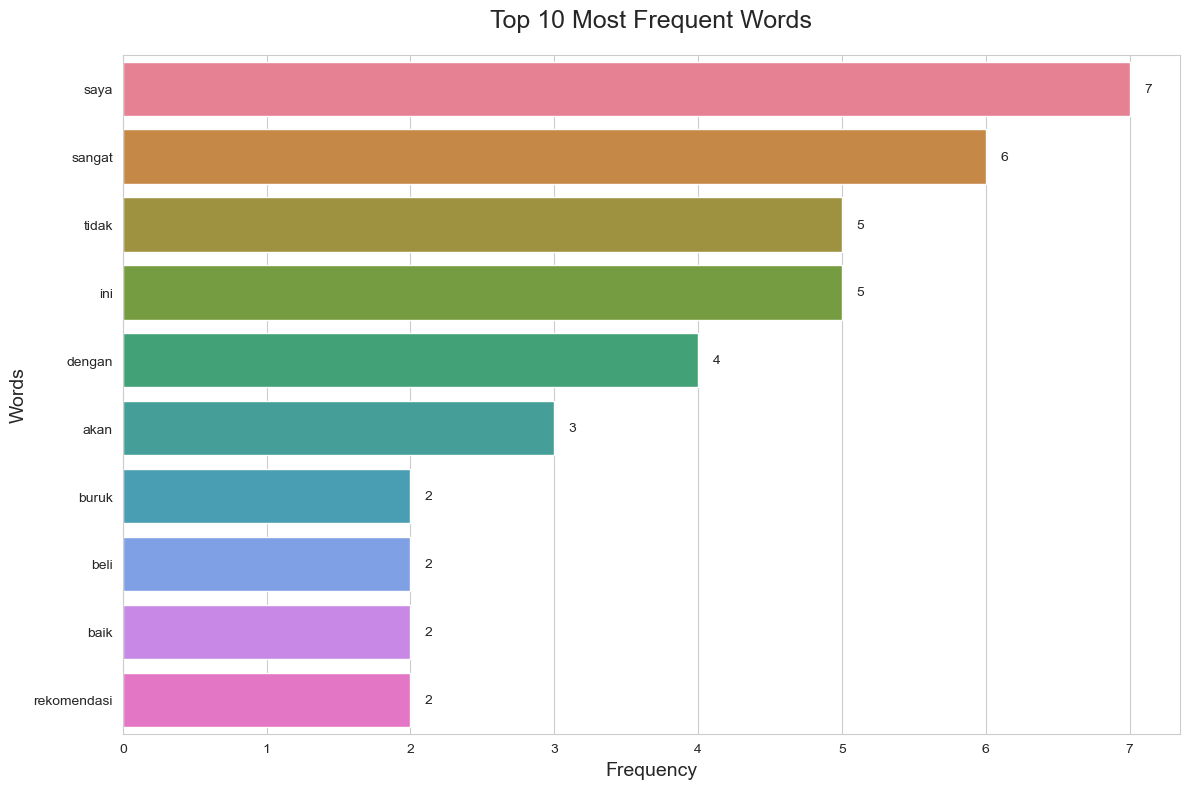

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

vocab = vectorizer.get_feature_names_out()
freqs = X.toarray().sum(axis=0)
word_freq_df = pd.DataFrame({'word': vocab, 'frequency': freqs})
word_freq_df = word_freq_df.sort_values('frequency', ascending=False)
top_n = 10
top_words = word_freq_df.head(top_n)
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.set_palette("viridis")
ax = sns.barplot(x='frequency', y='word', data=top_words, hue='word', legend=False)
plt.title("Top {} Most Frequent Words".format(top_n), fontsize=18, pad=20)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Words", fontsize=14)

for i, v in enumerate(top_words['frequency']):
    ax.text(v + 0.1, i, str(int(v)), va='center')

plt.tight_layout()
plt.show()